<a href="https://colab.research.google.com/github/lesiama/Basics-of-OpenCV-workshop/blob/main/workshop_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV (Open Source Computer Vision Library) — это открытая библиотека для работы с алгоритмами компьютерного зрения, машинным обучением и обработкой изображений. Написана на C++, но существует также для Python, JavaScript, Ruby и других языков программирования. 



Начнем с импорта самой библиотеки OpenCV и сопутствующих библиотек.



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

###Что такое изображение для компьютера?

[Текст из статьи на сайте Хабр](https://habr.com/ru/post/519454/)

 **Изображение** по сути своей набор пикселей с различной яркостью. **Пиксель** — это строительный блок изображения. Если представить изображение в виде сетки, то каждый квадрат в сетке содержит один пиксель, где точке с координатой ( 0, 0 ) соответствует верхний левый угол изображения. К примеру, представим, что у нас есть изображение с разрешением 400x300 пикселей. Это означает, что наша сетка состоит из 400 строк и 300 столбцов. В совокупности в нашем изображении есть 400*300 = 120000 пикселей.


В большинстве изображений пиксели представлены двумя способами: в оттенках серого (grayscale) и в цветовом пространстве RGB. В изображениях в оттенках серого каждый пиксель имеет значение между 0 и 255, где 0 соответствует чёрному, а 255 соответствует белому. А значения между 0 и 255 принимают различные оттенки серого, где значения ближе к 0 более тёмные, а значения ближе к 255 более светлые.


Цветные пиксели обычно представлены в цветовом пространстве RGB(red, green, blue — красный, зелёный, синий), где одно значение для красной компоненты, одно для зелёной и одно для синей. Каждая из трёх компонент представлена целым числом в диапазоне от 0 до 255 включительно, которое указывает как «много» цвета содержится. Исходя из того, что каждая компонента представлена в диапазоне [0,255], то для того, чтобы представить насыщенность каждого цвета, нам будет достаточно 8-битного целого беззнакового числа. Затем мы объединяем значения всех трёх компонент в кортеж вида (красный, зеленый, синий). К примеру, чтобы получить белый цвет, каждая из компонент должна равняться 255: (255, 255, 255). Тогда, чтобы получить чёрный цвет, каждая из компонент должна быть равной 0: (0, 0, 0).

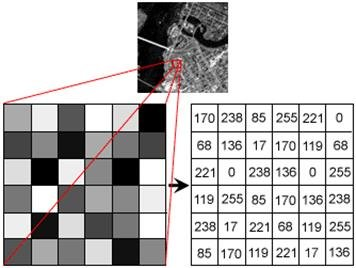 
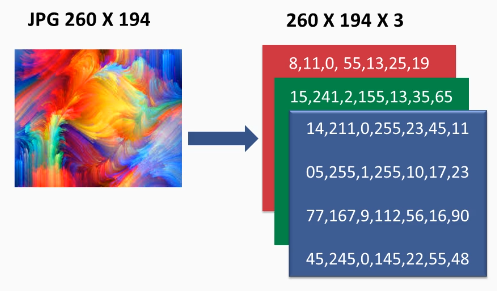

##Основные функции OpenCV для работы с изображениями

Считываем и выводим цветное изображение

Размер изображения: (500, 500)
Цветовая модель: 3 - RGB


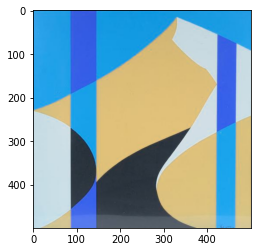

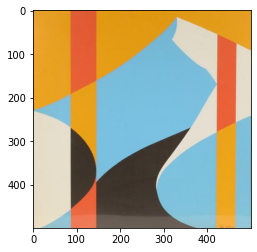

In [ ]:
img = cv2.imread('vassos_abstract_1.jpg')
print('Размер изображения:', img.shape[:2])
print(f'Цветовая модель: {img.shape[-1]} - RGB')
plt.imshow(img)
plt.show()

img = img[:, :, ::-1] # bgr to rgb (Matplotlib assumes the image as RGB input)
plt.imshow(img)
plt.show()

Считываем и выводим изображение в оттенках серого

Размер изображения: (500, 500) 
Цветовая модель: grayscale


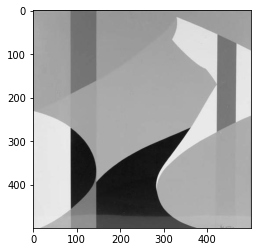

In [ ]:
img_gray = cv2.imread('vassos_abstract_1.jpg', 0)
print('Размер изображения:', img_gray.shape, f'\nЦветовая модель: grayscale')
plt.imshow(img_gray, cmap='gray')
plt.show()

Можно показать часть изображения:

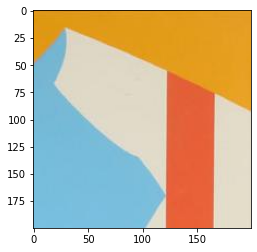

In [ ]:
small_part = img[0:200, 300:500]
plt.imshow(small_part)
plt.show()

Или совсем маленькую часть:

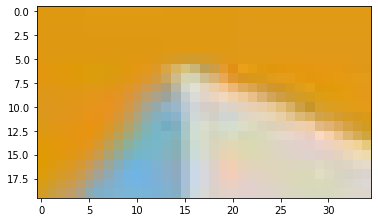

In [ ]:
very_small_part = img[10:30, 315:350]
plt.imshow(very_small_part)
plt.show()

Можем поменять цвет изображения сами:

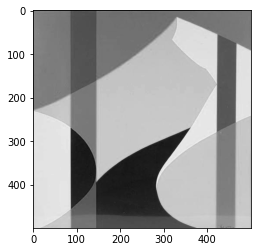

In [ ]:
img_conv_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_conv_gray, cmap='gray')
plt.show()

Можем сжать или рястянуть изображение:

Размер изображения: (200, 300)


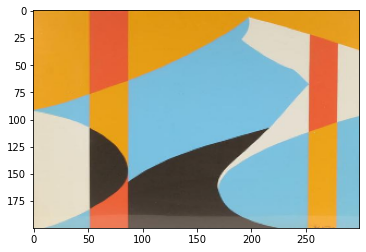

In [ ]:
img_scaled = cv2.resize(img, (300, 200))
print('Размер изображения:', img_scaled.shape[:2])
plt.imshow(img_scaled)
plt.show()

Размер изображения: (600, 300)


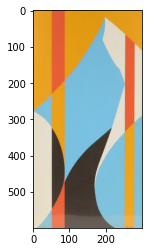

In [ ]:
img_scaled = cv2.resize(img, (300, 600))
print('Размер изображения:', img_scaled.shape[:2])
plt.imshow(img_scaled)
plt.show()

Можем сдвинуть изображение по осям:

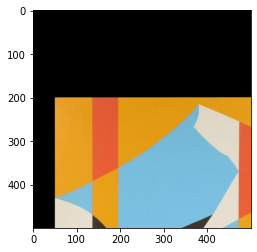

In [ ]:
height, width = img.shape[:2]
M = np.float32([
    [1, 0, 50],
    [0, 1, 200]]) #строим матрицу сдвига
img_tran = cv2.warpAffine(img, M, dsize=(width, height))
plt.imshow(img_tran)
plt.show()

Повернуть изображение:

In [ ]:
center = (width//2, height//2) #находим координаты центра изображения

M_rot = cv2.getRotationMatrix2D(center=center, angle=180, scale=1.0) #строим матрицу поворота
M_rot

array([[-1.0000000e+00,  1.2246468e-16,  5.0000000e+02],
       [-1.2246468e-16, -1.0000000e+00,  5.0000000e+02]])

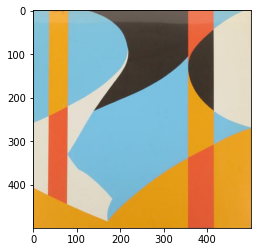

In [ ]:
img_rot = cv2.warpAffine(img, M_rot, (width, height))

plt.imshow(img_rot)
plt.show()

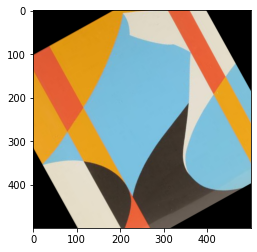

In [ ]:
from IPython.display import clear_output
from time import sleep

for a in range(0,30):
  M_rot = cv2.getRotationMatrix2D(center=center, angle=a, scale=1.0)
  img_rot = cv2.warpAffine(img, M_rot, (width, height))
  plt.imshow(img_rot)
  plt.show()
  sleep(0.5)
  clear_output(wait=True)

Можем рисовать линии и фигуры, добавлять подписи:

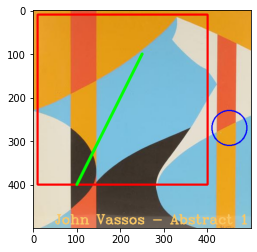

In [ ]:
img = cv2.imread('vassos_abstract_1.jpg')
img_draw = img
radius = 40
color = (255, 0, 0)
thickness = 2
cv2.circle(img_draw, (450,270), radius, color, thickness)
cv2.rectangle(img_draw, (10, 10), (400, 400), (0, 0, 255 ), 4)
cv2.line(img_draw, (250, 100), (100, 400), (0, 255, 0 ), 5)

font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img_draw, "John Vassos - Abstract 1", (50, 490), font, 1, (100, 200, 250), 2)
plt.imshow(img_draw[:, :, ::-1])
plt.show()


## Улучшение изображений с помощью пространственных фильтров

Основные методы:
*   Размытие (blurring)
*   Повыение четкости (sharpening)
*   Выделение краев
*   Создание рельефа/выдавливание (embossing)
*   etc.

Все эти методы реализуются с помощью **пространственной свертки изоражения и фильтра** (маски/ядра/матрицы свертки - все об одном). 

**Свертка** — это операция вычисления нового значения выбранного пикселя, учитывающая значения окружающих его пикселей. Для вычисления значения используется матрица, называемая **ядром свертки**. 
Обычно ядро свертки является квадратной матрицей n*n, где n — нечетное, однако ничто не мешает сделать матрицу прямоугольной. 

Во время вычисления нового значения выбранного пикселя ядро свертки как бы «прикладывается» своим центром (именно тут важна нечетность размера матрицы) к данному пикселю. Окружающие пиксели так же накрываются ядром. Далее высчитывается сумма, где слагаемыми являются произведения значений пикселей на значения ячейки ядра, накрывшей данный пиксель. Полученное значение как раз и является новым значением выбранного пикселя. Если применить свертку к каждому пикселю изображения, то в результате получится некий эффект, зависящий от выбранного ядра свертки. (https://habr.com/ru/post/62738/) 


<p><a href="https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif#/media/File:2D_Convolution_Animation.gif"><img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" alt="2D Convolution Animation.gif"></a><br>By &lt;a href="//commons.wikimedia.org/w/index.php?title=User:Plotke&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Plotke (page does not exist)"&gt;Michael Plotke&lt;/a&gt; - &lt;span class="int-own-work" lang="en"&gt;Own work&lt;/span&gt;, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=24288958">Link</a></p>

Примеры ядер:

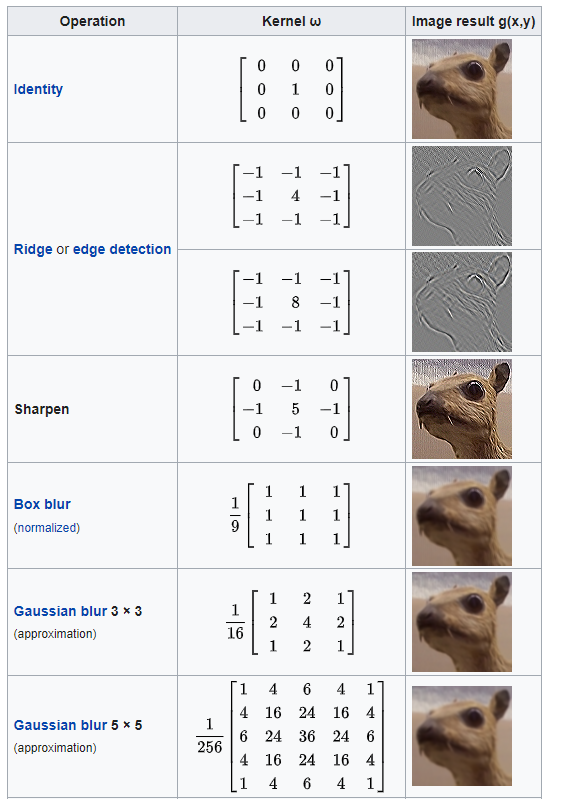

Источник: https://en.wikipedia.org/wiki/Kernel_(image_processing) 

Сайт, где можно попроовать разные ядра и посмотреть, что получится: https://setosa.io/ev/image-kernels/ 

### Размытие

Таким образом, картинку можно размыть, используя свертку с фильтром размытия (например, Гауссов, усредняющий, медианный)

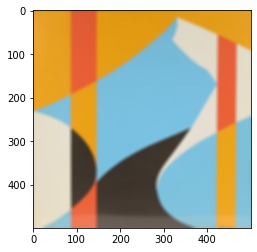

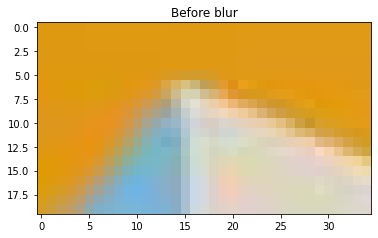

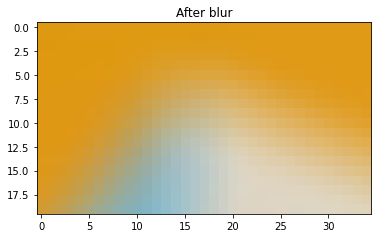

In [ ]:
img = cv2.imread('vassos_abstract_1.jpg')
blur_img = cv2.blur(img, (10,10))
plt.imshow(blur_img[:, :, ::-1])
plt.show()

plt.imshow(img[10:30, 315:350, ::-1])
plt.title('Before blur')

plt.show()
plt.imshow(blur_img[10:30, 315:350, ::-1])
plt.title('After blur')
plt.show()

### Повышение резкости

Помимо этого, можно повысить резкость картинки, используя свертку с подходящим фильтром

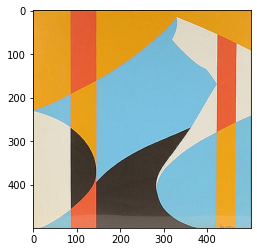

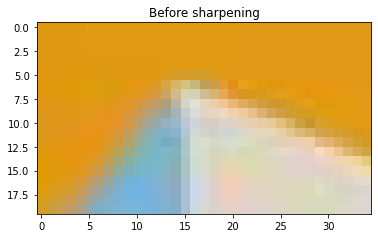

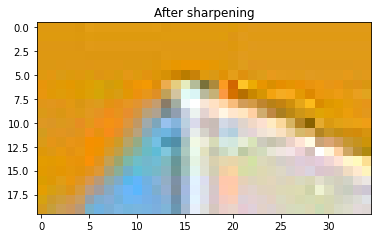

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharp_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(sharp_img[:, :, ::-1])
plt.show()

plt.imshow(img[10:30, 315:350, ::-1])
plt.title('Before sharpening')

plt.show()
plt.imshow(sharp_img[10:30, 315:350, ::-1])
plt.title('After sharpening')
plt.show()

### Выделение краев

Отдельная группа фильтров и методов используется для выделения краев на изображениях (областей, со значительными перепадами яркости пикселей). Например, такие фильтры, как Лапласиан, оператор Собеля, оператор Превитта. Наиболее популярный детектор границ - алгоритм Кэнни.

Ядро свертки - Лапласиан

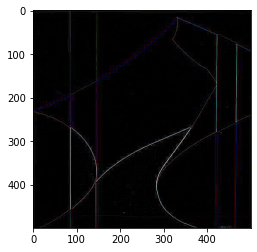

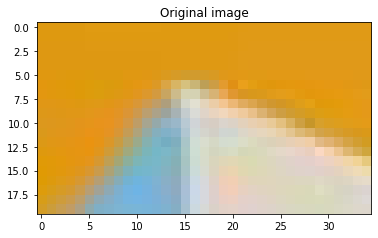

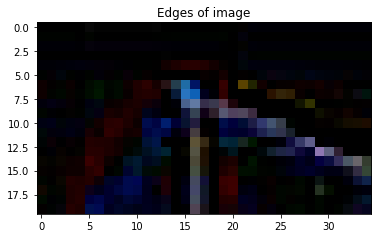

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8,-1],
                   [-1, -1, -1]])
edges_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(edges_img[:, :, ::-1])
plt.show()

plt.imshow(img[10:30, 315:350, ::-1])
plt.title('Original image')
plt.show()

plt.imshow(edges_img[10:30, 315:350, ::-1])
plt.title('Edges of image')
plt.show()

Ядро свертки - оператор Собеля (бывает вертикальный и горизонтальный)

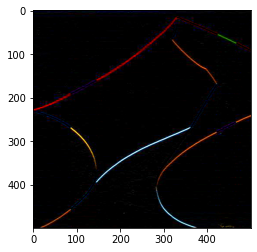

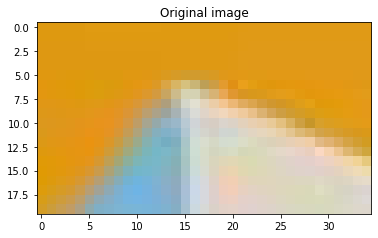

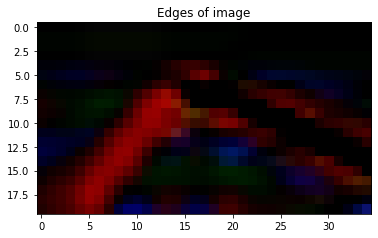

In [ ]:
kernel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
edges_img_sob1 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(edges_img_sob1[:, :, ::-1])
plt.show()

plt.imshow(img[10:30, 315:350, ::-1])
plt.title('Original image')
plt.show()

plt.imshow(edges_img_sob1[10:30, 315:350, ::-1])
plt.title('Edges of image')
plt.show()

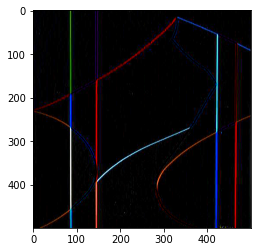

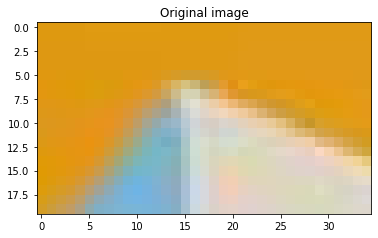

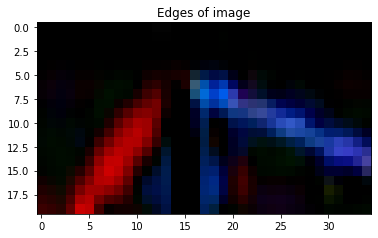

In [ ]:
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
edges_img_sob2 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(edges_img_sob2[:, :, ::-1])
plt.show()

plt.imshow(img[10:30, 315:350, ::-1])
plt.title('Original image')
plt.show()

plt.imshow(edges_img_sob2[10:30, 315:350, ::-1])
plt.title('Edges of image')
plt.show()

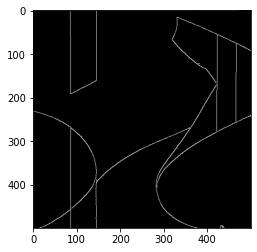

In [ ]:
edges_img_canny = cv2.Canny(img_gray, 30, 200)
plt.imshow(edges_img_canny, cmap='gray')
plt.show()

Фильтры можно совмещать или вычитать.
 

*   Например, чтобы получить более четкое изображение, можно вычесть края из исходного изображаения.
*   Можно вычесть края из размытого изображения, чтобы получить размытый фон и четкие детали на переднем плане (так делают с рентгеновскими и другими медицинскими изображениями, так как фон там темный и может содержать шумы).



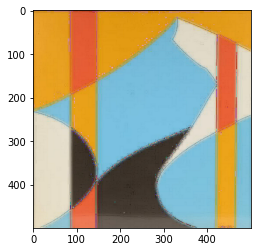

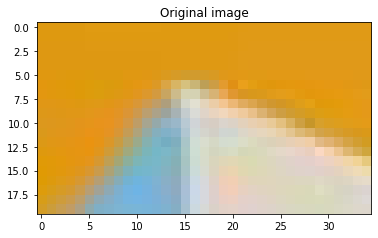

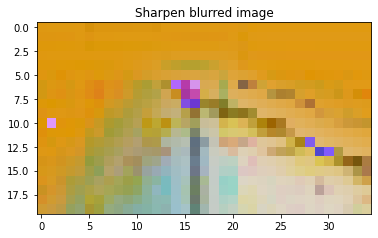

In [ ]:
sharp_blur_img = blur_img - edges_img

plt.imshow(sharp_blur_img[:, :, ::-1])
plt.show()

plt.imshow(img[10:30, 315:350, ::-1])
plt.title('Original image')
plt.show()

plt.imshow(sharp_blur_img[10:30, 315:350, ::-1])
plt.title('Sharpen blurred image')
plt.show()

###Зачем это нужно, помимо обработки изображений?

Такие фильтры часто используются для выделения **признаков** на изображении - наиболее выжных частей - при обучении нейросетей ([сверточные нейронные сети](https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C)). 

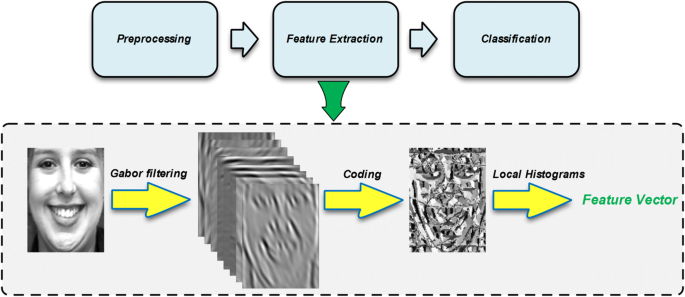

## Нахождение контуров 

Контур получается, когда на границе объекта соединяются все точки. Как правило, конкретный контур относится к граничным пикселям, имеющим одинаковый цвет и интенсивность. 

Загрузим новое изображение

Размер изображения: (374, 300)
Цветовая модель: 3 - RGB


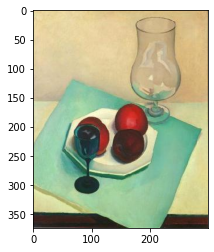

In [ ]:
img_2 = cv2.imread('sheeler_still_life.jpg')
print('Размер изображения:', img_2.shape[:2])
print(f'Цветовая модель: {img_2.shape[-1]} - RGB')
plt.imshow(img_2[:, :, ::-1])
plt.show()

Размер изображения: (374, 300) 
Цветовая модель: grayscale


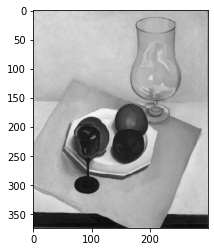

In [ ]:
img2_gray = cv2.imread('sheeler_still_life.jpg', 0)
print('Размер изображения:', img2_gray.shape, f'\nЦветовая модель: grayscale')
plt.imshow(img2_gray, cmap='gray')
plt.show()

### Бинаризация

Процесс **бинаризации** – это перевод цветного (или в градациях серого) изображения в двухцветное черно-белое. Главным параметром такого преобразования является порог t – значение, с которым сравнивается яркость каждого пикселя. По результатам сравнения, пикселю присваивается значение 0 или 1.
https://habr.com/ru/post/278435/ 

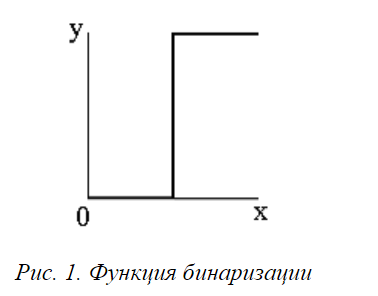

http://aco.ifmo.ru/el_books/image_processing/5_02.html 

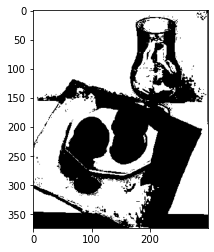

In [ ]:
_, threshed = cv2.threshold(img2_gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(threshed, cmap='gray')
plt.show()

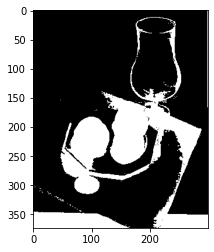

In [ ]:
_, threshed_inv = cv2.threshold(img2_gray, 160, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshed_inv, cmap='gray')
plt.show()

### Нахождение контуров на бинарном изображении

Используем простое бинарное изображение:

Number of contours found -  106


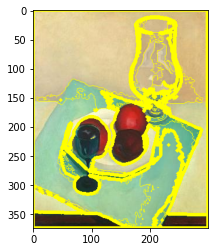

In [ ]:
contours, hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found - ", len(contours))

cont_img = cv2.drawContours(img_2, contours, -1, (0,255,255), 1)
plt.imshow(cont_img[:, :, ::-1])
plt.show()

Используем инвертированное бинарное изображение:

Number of contours found -  66


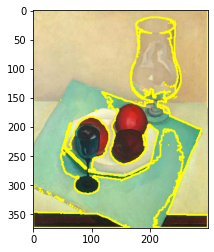

In [ ]:
contours, hierarchy = cv2.findContours(threshed_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found - ", len(contours))
img_2 = cv2.imread('sheeler_still_life.jpg')

cont_img_inv = cv2.drawContours(img_2, contours, -1, (0,255,255), 2)
plt.imshow(cont_img_inv[:, :, ::-1])
plt.show()

### Зачем это нужно?
Для **сегментации** изображений - разделения изображения на области, для которых выполняется определенный критерий однородности, например, выделение на изображении областей приблизительно одинаковой яркости. Область изображения - группа элементов изображения, имеющих определенный общий признак (свойство). **Сегментация фона/переднего плана**: чтобы заменить фон изображения другим, необходимо выполнить извлечение изображения переднего плана (аналогично сегментации изображения).

https://habr.com/ru/post/128768/

Для **обнаружения движения**. В видеонаблюдении технология обнаружения движения имеет множество приложений, начиная от внутренней и внешней безопасности, контроля дорожного движения, обнаружения поведения во время занятий спортом, поиск оставленных без присмотра объектов и даже сжатие видео. 

Для **поиска подозрительных объектов** - автоматического обнаружение объекта посредством формирования контура с использованием вычитания фона.

https://waksoft.susu.ru/2021/11/30/obnaruzhenie-kongurov-s-ispolzovaniem-opencv/#Drawing-Contours-using-CHAIN_APPROX_NONE 


## Распознавание лиц

Будем использовать алгоритм каскад Хаара, так как его легко реализовать в OpenCV, не используя сторонние библиотеки. Алгоритм использовался в первом детекторе лиц, работающем в реальном времени. С развитием нейросетей для задач компьютерного зрения, алгоритм стал устаревать, он уже не считается самым быстрым и точным, но тем не менее, с задачей распознавания он справляется.

https://habr.com/ru/company/recognitor/blog/228195/ 
https://habr.com/ru/post/133826/

Используем предобученные модели из библиотеки OpenCV.

https://github.com/opencv/opencv/tree/master/data/haarcascades

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

Загрузим изображение, содержащее лицо

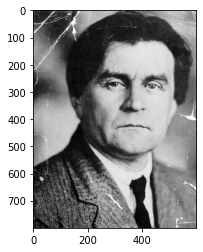

In [3]:
img_face = cv2.imread('malevich_photo.webp')
gray_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_face, cmap='gray')
plt.show()

Применим каскадный классификатор и выделим лица и глаза с помощью прямоугольников по найденным координатам

In [4]:
faces = face_cascade.detectMultiScale(gray_face, 1.05, 5)

for (x,y,w,h) in faces:
    img_face = cv2.rectangle(img_face,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_face[y:y+h, x:x+w]
    roi_color = img_face[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

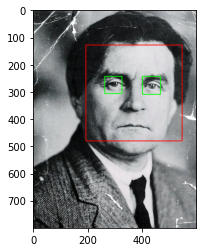

In [5]:
plt.imshow(img_face)
plt.show()

Попробуем распознать лицо на портрете художника

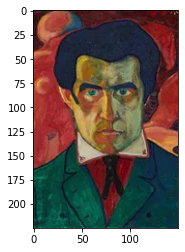

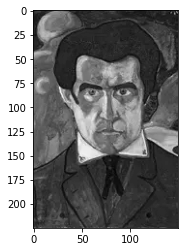

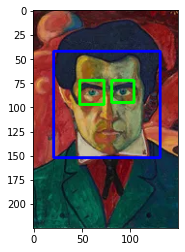

In [55]:
img_portrait1 = cv2.imread('malevich_portrait.webp')
plt.imshow(img_portrait1[:, :, ::-1])
plt.show()

gray_portrait1 = cv2.cvtColor(img_portrait1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_portrait1, cmap='gray')
plt.show()
faces = face_cascade.detectMultiScale(gray_portrait1, 1.02, 5)

for (x,y,w,h) in faces:
    img_portrait1 = cv2.rectangle(img_portrait1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_portrait1[y:y+h, x:x+w]
    roi_color = img_portrait1[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_portrait1[:, :, ::-1])
plt.show()

На портрете распозналось лицо и глаза

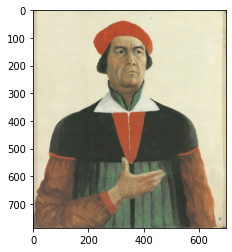

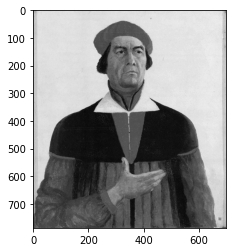

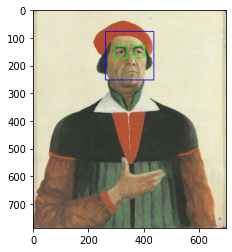

In [8]:
img_portrait2 = cv2.imread('malevich_portrait2.jpg')
plt.imshow(img_portrait2[:, :, ::-1])
plt.show()

gray_portrait2 = cv2.cvtColor(img_portrait2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_portrait2, cmap='gray')
plt.show()

faces = face_cascade.detectMultiScale(gray_portrait2, 1.3, 5)

for (x,y,w,h) in faces:
    img_portrait2 = cv2.rectangle(img_portrait2,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_portrait2[y:y+h, x:x+w]
    roi_color = img_portrait2[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_portrait2[:, :, ::-1])
plt.show()

На этом портрете тоже распозналось все

Возьмем менее "реалистичный" портрет

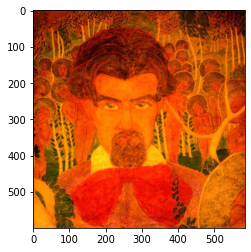

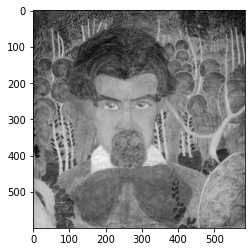

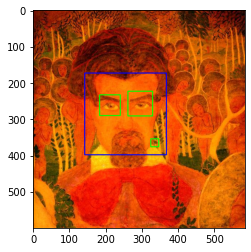

In [20]:
img_portrait3 = cv2.imread('malevich_portrait3.jpg')
plt.imshow(img_portrait3[:, :, ::-1])
plt.show()

gray_portrait3 = cv2.cvtColor(img_portrait3, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_portrait3, cmap='gray')
plt.show()

faces = face_cascade.detectMultiScale(gray_portrait3, 1.05, 5)

for (x,y,w,h) in faces:
    img_portrait3 = cv2.rectangle(img_portrait3,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_portrait3[y:y+h, x:x+w]
    roi_color = img_portrait3[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_portrait3[:, :, ::-1])
plt.show()

На портрете хорошо распознается лицо, но помимо глаз, распознается лишняя деталь

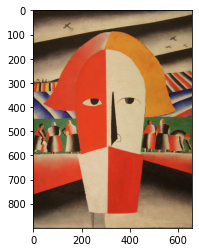

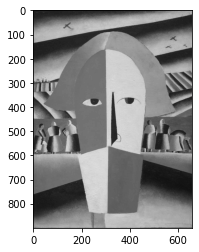

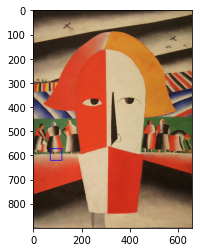

In [48]:
img_portrait4 = cv2.imread('portrait4.jpg')
plt.imshow(img_portrait4[:, :, ::-1])
plt.show()

gray_portrait4 = cv2.cvtColor(img_portrait4, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_portrait4, cmap='gray')
plt.show()

faces = face_cascade.detectMultiScale(gray_portrait4, 1.05, 5)

for (x,y,w,h) in faces:
    img_portrait4 = cv2.rectangle(img_portrait4,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_portrait4[y:y+h, x:x+w]
    roi_color = img_portrait4[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_portrait4[:, :, ::-1])
plt.show()

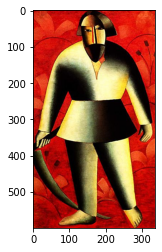

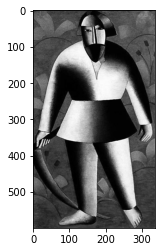

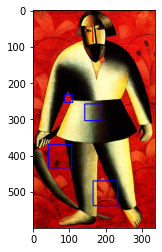

In [38]:
img_man = cv2.imread('man.jpg')
plt.imshow(img_man[:, :, ::-1])
plt.show()

gray_man = cv2.cvtColor(img_man, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_man, cmap='gray')
plt.show()

faces = face_cascade.detectMultiScale(gray_man, 1.01, 5)

for (x,y,w,h) in faces:
    img_man = cv2.rectangle(img_man,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_man[y:y+h, x:x+w]
    roi_color = img_man[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_man[:, :, ::-1])
plt.show()

Распознаются какие-то области изображения, но не лицо и глаза

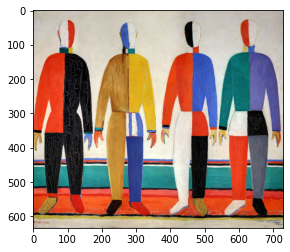

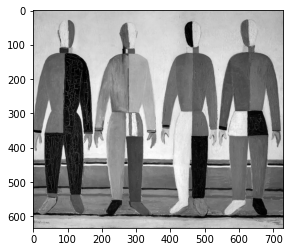

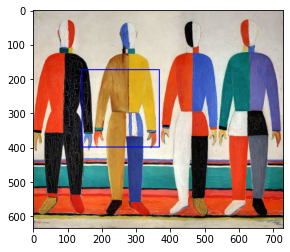

In [29]:
img_people = cv2.imread('sports.jpg')
plt.imshow(img_people[:, :, ::-1])
plt.show()

gray_people = cv2.cvtColor(img_people, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_people, cmap='gray')
plt.show()

faces = face_cascade.detectMultiScale(gray_portrait3, 1.05, 5)

for (x,y,w,h) in faces:
    img_people = cv2.rectangle(img_people,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_people[y:y+h, x:x+w]
    roi_color = img_people[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_people[:, :, ::-1])
plt.show()

Так как на картине отсутствут лица и глаза, алгоритм их не находит, но выделяет туловище одного из спортсменов как наиболее близкую по признакам к лицу (по мнению классификатора) область

###Выводы

Распознавание лиц - важная задача компьютерного зрения. На данный момент, существует ряд моделей, способных с высокой точностью определять лица людей на фотографиях и видео. Даже не самые современные алгоритмы, простые в применении и использующие только различные математические преобразования, а не многослойные нейросети, способны справляться с этой задачей достаточно хорошо. Тем не менее, с задачей обнаружения лиц на картинах и предметах искусства, такие модели справляются хуже. И чем менее "реалистично" изображено лицо человека, тем менее точно оно распознается алгоритмом. 